# Business Case: Walmart - Confidence Interval and CLT

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
#Import the libraries:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the Walmart data:

walmart = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
walmart.shape

(550068, 10)

In [4]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [5]:
walmart.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [6]:
#Checking missing values:
walmart.isnull().sum()/len(walmart)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

Observations:

1. There are no missing values in the data.
2. There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.
3. There are 7 unique age groups and most of the purchase belongs to age 26-35 group.
4. There are 3 unique citi categories with category B being the highest.
5. 5 unique values for Stay_in_current_citi_years with 1 being the highest.
6. The difference between mean and median seems to be significant for purchase that suggests outliers in the data.
7. Minimum & Maximum purchase is 12 and 23961 suggests the purchasing behaviour is quite spread over a aignificant range of values. Mean is 9264 and 75% of purchase is of less than or equal to 12054. It suggest most of the purchase is not more than 12k.
8. Few categorical variable are of integer data type. It can be converted to character type.
9. Out of 550068 data points, 414259's gender is Male and rest are the female. Male purchase count is much higher than female.
10. Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.

In [7]:
columns = ['User_ID', 'Occupation', 'Marital_Status', 'Product_Category']
walmart[columns] = walmart[columns].astype('object')

In [8]:
walmart.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observation after modifying the categorical variable's data type:

1. There are 5891 unique users, and userid 1001680 being with the highest count.
2. The customers belongs to 21 distinct occupation for the purchases being made with Occupation 4 being the highest.
3. Marital status unmarried contribute more in terms of the count for the purchase.
4. There are 20 unique product categories with 5 being the highest.

In [9]:
# Checking how categorical variables contributes to the entire data
cate_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
walmart[cate_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(walmart)*100

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

Observations:

1. 40% of the purchase done by aged 26-35 and 78% purchase are done by the customers aged between the age 18-45 (40% : 26-35, 18% : 18-25, 20% : 36-45)
2. 75% of the purchase count are done by Male and 25% by Female
3. 60% Single, 40% Married contributes to the purchase count.
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. There are 20 product categories in total.
6. There are 20 different types of occupations in the city.

In [10]:
#Checking how the data is spread basis distinct users
wm = walmart.groupby(['User_ID'])['Age'].unique()
wm.value_counts()/len(wm)*100

[26-35]    34.849771
[36-45]    19.809879
[18-25]    18.146325
[46-50]     9.013750
[51-55]     8.164997
[55+]       6.314717
[0-17]      3.700560
Name: Age, dtype: float64

Observation:

1. We can see 35% of the users are aged 26-35.
2. From the previous observation we saw 40% of the purchase are done by users aged 26-35. And, we have 35% of users aged between 26-35 and they are contributing 40% of total purchase count.So, we can infer users aged 26-35 are more frequent  customers.

In [11]:
wm = walmart.groupby(['User_ID'])['Gender'].unique()
wm.value_counts()/len(wm)*100

[M]    71.719572
[F]    28.280428
Name: Gender, dtype: float64

Observation: We have 72% male users and 28% female users. Combining with previous observations we can see 72% of male users contributing to 75% of the purchase count and 28% of female users are contributing to 25% of the purchase count.

In [12]:
wm = walmart.groupby(['User_ID'])['Marital_Status'].unique()
wm.value_counts()/len(wm)*100

[0]    58.003735
[1]    41.996265
Name: Marital_Status, dtype: float64

Observation: We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.

In [13]:
wm = walmart.groupby(['User_ID'])['City_Category'].unique()
wm.value_counts()/len(wm)*100

[C]    53.284672
[B]    28.976405
[A]    17.738924
Name: City_Category, dtype: float64

Observation: 53% of the users belong to city category C whereas 29% to category B and 18% belong to category A. Combining from the previous observation category B purchase count is 42% and Category C purchase count is 31%. We can clearly see category B are more actively purchasing inspite of the fact they are only 28% of the total users. On the other hand, we have 53% of category C users but they only contribute 31% of the total purchase count.


In [14]:
#Checking the age group distribution in different city categories
pd.crosstab(index=walmart["City_Category"],columns=walmart["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


Observation: We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.


In [15]:
#Checking how genders are contributing towards toatl purchase amount
wm=pd.DataFrame(walmart.groupby(['Gender'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


Observation: We can see male(72% of the population) contributes to more than 76% of the total purchase amount whereas female(28% of the population) contributes 23% of the total purchase amount.

In [16]:
#Checking how purchase value are spread among differnt age categories
wm=pd.DataFrame(walmart.groupby(['Age'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


Observation: We can see the net purchase amount spread is similar to the purchase count spread among the different age groups.

In [17]:
#Checking how purchase value are spread among differnt marital status
wm=pd.DataFrame(walmart.groupby(['Marital_Status'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
Marital_Status,,
0,3008927447,59.047057
1,2086885295,40.952943


Observations: Single users are contributing 59% towards the total purchase amount in comparison to 41% by married users.

In [18]:
#Checking how purchase value are spread among differnt city categories
wm=pd.DataFrame(walmart.groupby(['City_Category'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
City_Category,,
A,1316471661,25.834381
B,2115533605,41.515136
C,1663807476,32.650483


Observations: City_category contribution to the total purchase amount is also similar to their contribution towards Purchase count. Still, combining with previous observation we can City_category C although has percentage purchase count of 31% but they contribute more in terms of purchase amount i.e. 32.65%. We can infer City category C purchase higher value products.


In [19]:
# Users with highest number of purchases
walmart.groupby(['User_ID'])['Purchase'].count().nlargest(10) 

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: Purchase, dtype: int64

In [20]:
#Users with highest purchases amount
walmart.groupby(['User_ID'])['Purchase'].sum().nlargest(10) 

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

Observation: The users with high number of purchases contribute more to the purchase amount. Still, we can see there are few users not in the list of top 10 purchase counts are there in list of top 10 purchase amount. Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count.

In [21]:
#Checking how purchase value are spread among differnt occupation categories
wm=pd.DataFrame(walmart.groupby(['Occupation'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


Observations: Some of the Occupation like 0, 4, 7 has contributed more towards total purchase amount.

In [22]:
#Checking how purchase value are spread among differnt product categories
wm=pd.DataFrame(walmart.groupby(['Product_Category'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
Product_Category,,
1,1910013754,37.482024
2,268516186,5.269350
3,204084713,4.004949
4,27380488,0.537313
5,941835229,18.482532
6,324150302,6.361111
7,60896731,1.195035
8,854318799,16.765114
9,6370324,0.125011


Observations: 1, 8, 5 are among the highest yielding product categories and 19, 20, 13 are among the lowest in terms of their contribution to total amount.

In [23]:
wm=pd.DataFrame(walmart.groupby(['Stay_In_Current_City_Years'])[['Purchase']].sum())

wm['Percent'] = (wm['Purchase']/wm['Purchase'].sum())*100
wm

,Purchase,Percent
Stay_In_Current_City_Years,,
0,682979229,13.402754
1,1792872533,35.183250
2,949173931,18.626547
3,884902659,17.365290
4+,785884390,15.422160


#### Univariate Analysis:

We can explore the distribution of the data for the quantitative attributes using histplot.



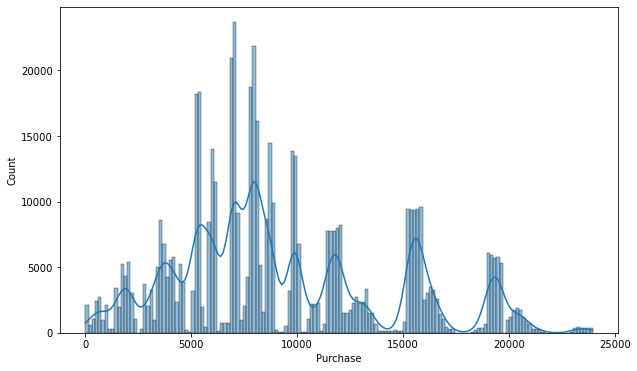

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=walmart, x="Purchase", kde=True)
plt.show()

Observation: We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

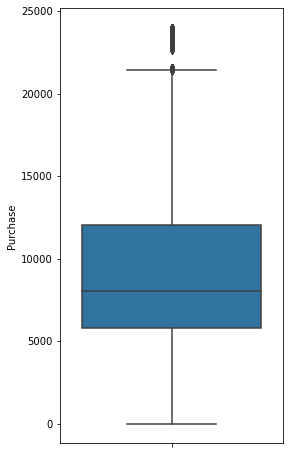

In [25]:
plt.figure(figsize=(4, 8))
sns.boxplot(data=walmart, y='Purchase')
plt.show()

Observation: We can see there are outliers in the data for purchase.

##### Univariate analysis for qualitative variables:

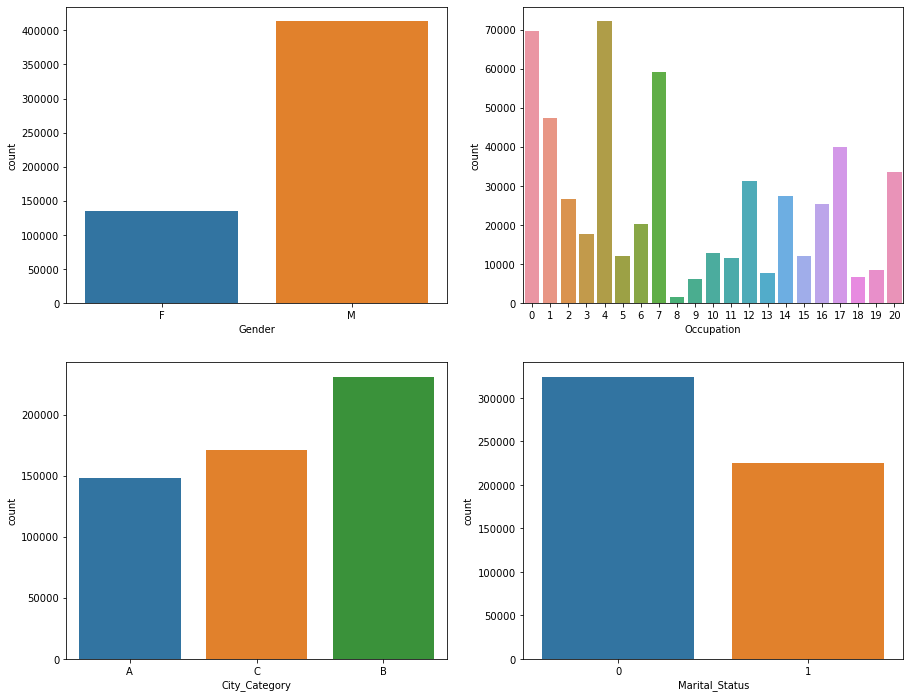

In [26]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
sns.countplot(data=walmart, x='Gender', ax=axs[0,0])
sns.countplot(data=walmart, x='Occupation', ax=axs[0,1])
sns.countplot(data=walmart, x='City_Category', ax=axs[1,0])
sns.countplot(data=walmart, x='Marital_Status', ax=axs[1,1])
plt.show()

Observations:
1. We can clearly see from the graphs above the purchases done by males are much higher than females.
2. We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
3. The purchases are highest from City category B.
4. Single customer purchases are higher than married users.

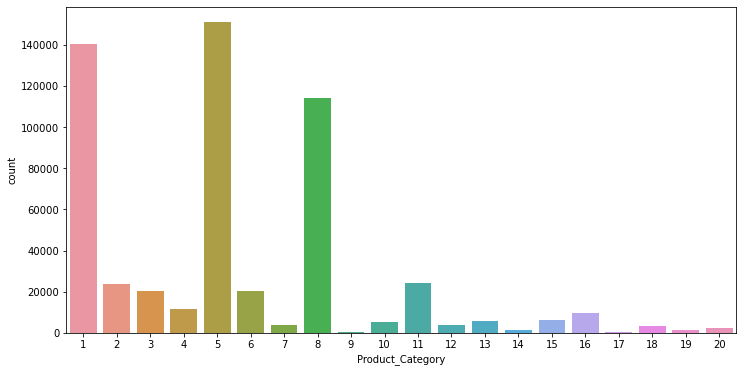

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(data=walmart, x='Product_Category')
plt.show()

Observations: There are 20 product categories with product category 1, 5 and  8 having higher purchasing frequency.

#### Bivariate Analysis:

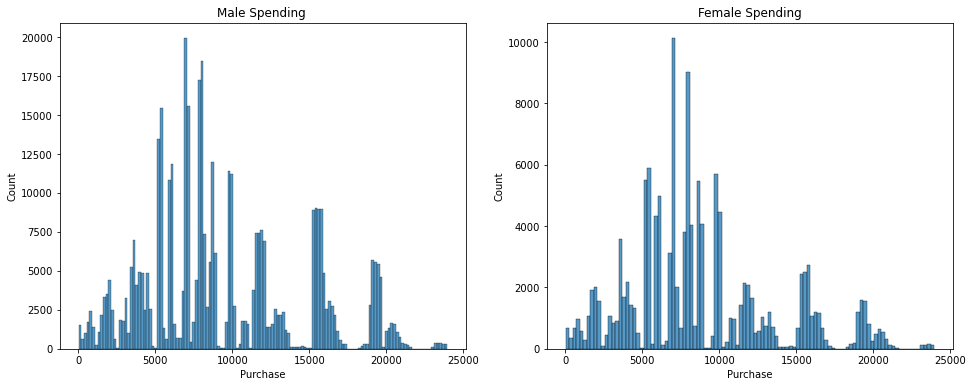

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.histplot(data=walmart[walmart['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending ")
sns.histplot(data=walmart[walmart['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending")
plt.show()

Observations: From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.

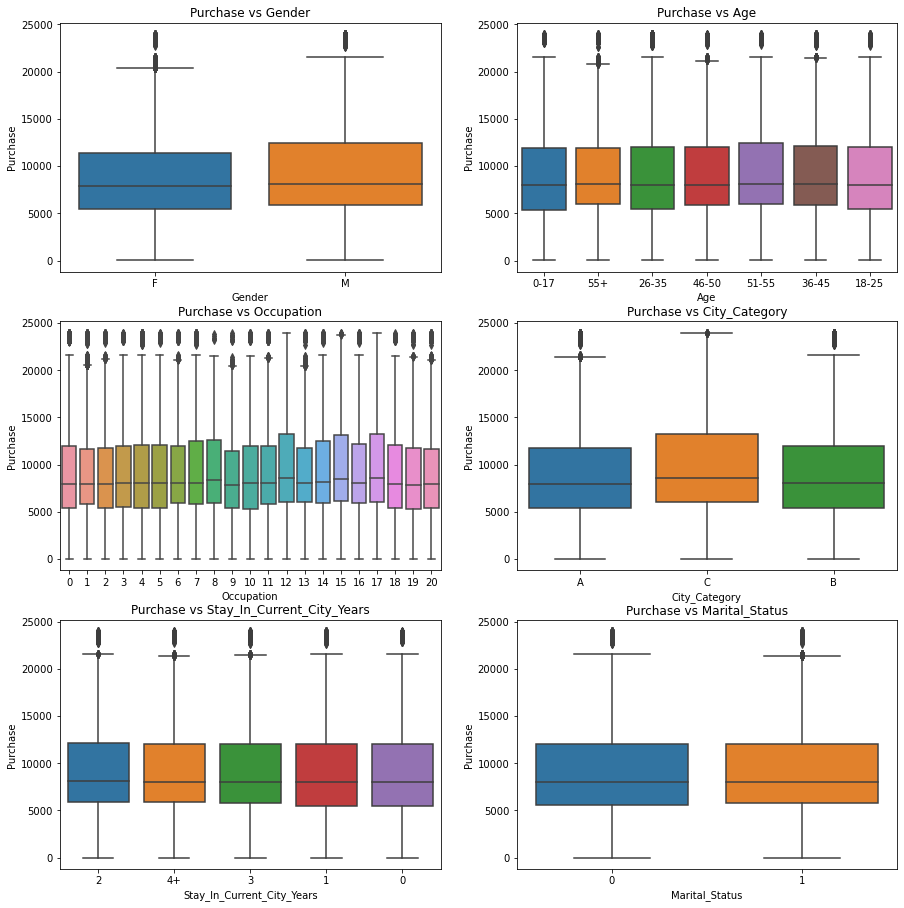

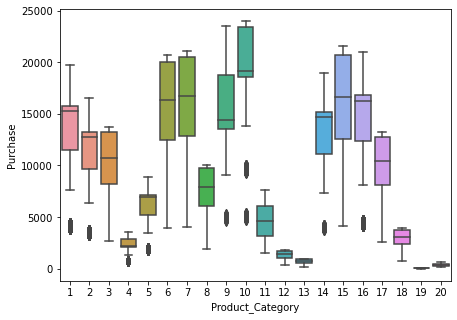

In [29]:
df = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for col in range(2):
        sns.boxplot(data=walmart, y='Purchase', x=df[count], ax=axs[row, col],)
        axs[row,col].set_title(f"Purchase vs {df[count]}")
        count += 1
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(data=walmart, y='Purchase', x='Product_Category')
plt.show()

Observations:
1. The spending behaviour for males and females are similar as we had seen from the above histplot. Males purchasing value are in the little higher range than females.
2. Among differnt age categories, we see similar purchase behaviour. For all age groups, most of the purchases are of the values between 5k to 12k with all have some outliers.
3. Among different occupation as well, we see similar purchasing behaviour in terms of the purchase values.
4. Similarly for City category, stay in current city years, marital status - we see the users spends mostly in the range of 5k to 12k.
5. We see variations among product categories. Product category 10 products are the costliest ones. Also, there are few outliers for some of the product categories.

#### Multivariate analysis:

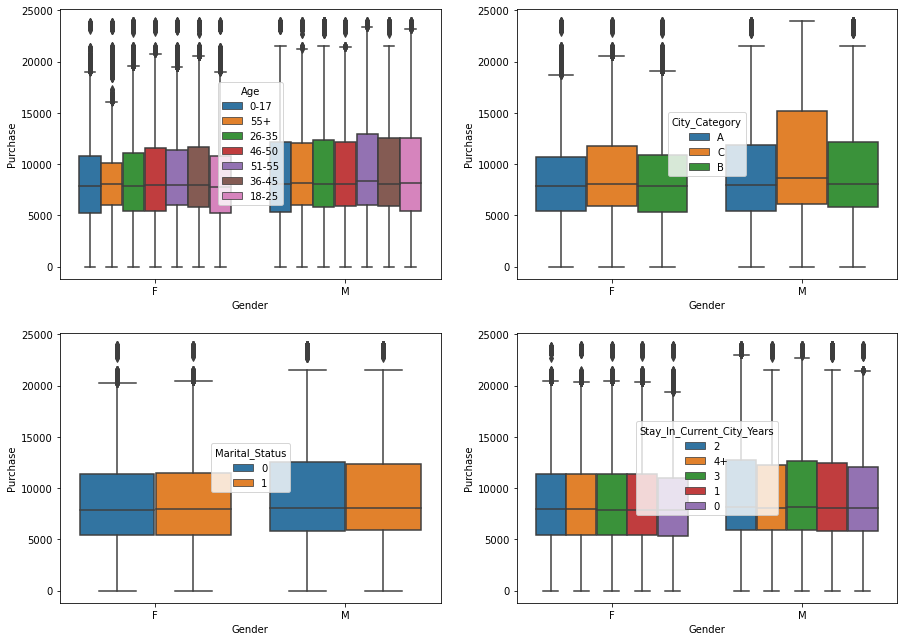

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))
fig.subplots_adjust(top=1.5)
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Age', ax=axs[0,0])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='City_Category', ax=axs[0,1])

sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Marital_Status', ax=axs[1,0])
sns.boxplot(data=walmart, y='Purchase', x='Gender', hue='Stay_In_Current_City_Years', ax=axs[1,1])

plt.show()

Observations:
1. The purchasing pattern is very much similar for males and females even among differnt age groups.
2. The purchasing behaviour of males and females basis different citi categories is also similar in nature. Still,  males from city category B tends to purchase costlier products in comparison to females.
3. Males and females spending behaviour remains similar even when take into account their marital status.
4. Purchase values are similar for males and females basis Stay_in_current_city_years. Although, Males buy slightly high value products.

##### Average amount spend per males and females:

In [31]:
gender_avg = walmart.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
gender_avg = gender_avg.reset_index()
gender_avg

,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [32]:
# Gender wise count in the entire data
gender_avg['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Males Avg Spend')

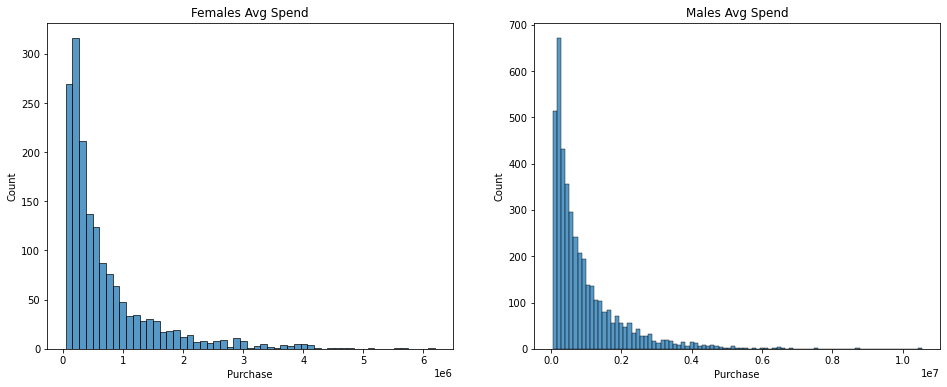

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.histplot(data=gender_avg[gender_avg['Gender']=='F']['Purchase'], ax=axs[0]).set_title("Females Avg Spend")
sns.histplot(data=gender_avg[gender_avg['Gender']=='M']['Purchase'], ax=axs[1]).set_title("Males Avg Spend")

Observations: Average amount spend by males are higher than females.

In [34]:
gender_avg.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [35]:
gender_avg.groupby(['Gender'])[['Purchase']].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


Observations:
1. Average amount for the males is 925344 for the entire population whereas it's much lesser for females(712024).
2. Total amount spend by males is around 4 billion whereas for females it's 1.2 billion. 

In [36]:
male_avg = gender_avg[gender_avg['Gender']=='M']
female_avg = gender_avg[gender_avg['Gender']=='F']

In [37]:
#Finding the sample(sample size=1000) for avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = male_avg.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = female_avg.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)

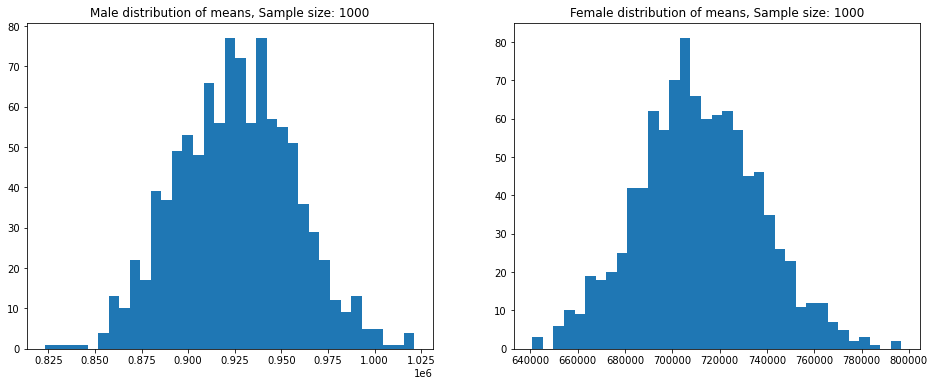

In [38]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 1000")
axis[1].set_title("Female distribution of means, Sample size: 1000")

plt.show()

Observations: The means sample seems to be normally distributed for both males and females. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem. 

In [39]:
#Calculating 90% confidence interval for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(male_avg['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_avg['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925368.61
Sample avg spend amount for Female: 711268.50

Sample std for Male: 31391.18
Sample std for Female: 25556.17

Sample std error for Male: 992.68
Sample std error for Female: 808.16

Male_CI:  [923735.6574019564, 927001.5624440438]
Female_CI:  [709939.0780594031, 712597.9146865966]


Observation:
Now using the Confidence interval at 90%, we can say that:
* Average amount spend by male customers lie in the range 9,24,412.29 - 9,27,754.50
* Average amount spend by female customers lie in range 7,11,369.95 - 7,14,068.06

In [40]:
#Calculating 95% confidence interval for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(male_avg['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_avg['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])


Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925368.61
Sample avg spend amount for Female: 711268.50

Sample std for Male: 31391.18
Sample std for Female: 25556.17

Sample std error for Male: 992.68
Sample std error for Female: 808.16

Male_CI:  [923422.9643660119, 927314.2554799883]
Female_CI:  [709684.5085950973, 712852.4841509024]


Observation: Now using the Confidence interval at 95%, we can say that:
* Average amount spend by male customers lie in the range 9,24,092.29 - 9,28,074.50
* Average amount spend by female customers lie in range 7,11,111.62 - 7,14,326.38

In [41]:
#Calculating 99% confidence interval for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(male_avg['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_avg['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1000))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1000)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1000)
sample_std_error_female=sample_std_female/np.sqrt(1000)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 925368.61
Sample avg spend amount for Female: 711268.50

Sample std for Male: 31391.18
Sample std for Female: 25556.17

Sample std error for Male: 992.68
Sample std error for Female: 808.16

Male_CI:  [922811.475762387, 927925.7440836132]
Female_CI:  [709186.6838648994, 713350.3088811003]


Observation: Now using the Confidence interval at 99%, we can say that:
* Average amount spend by male customers lie in the range 9,23,466.52 - 9,28,700.27
* Average amount spend by female customers lie in range 7,10,606.4 - 7,14,831.56

In [42]:
#Calculating 90% confidence interval for sample size 1500:

#Finding the sample(sample size=1000) avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1500

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = male_avg.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = female_avg.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)
    
#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Male: {:.2f}".format(male_avg['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_avg['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z90*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z90*sample_std_error_male

Upper_Limit_female=z90*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z90*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924434.94
Sample avg spend amount for Female: 711800.78

Sample std for Male: 25708.70
Sample std for Female: 21523.71

Sample std error for Male: 663.80
Sample std error for Female: 555.74

Male_CI:  [923342.9961750751, 925526.8845942583]
Female_CI:  [710886.5834105526, 712714.9675467805]


Observation: Now using the Confidence interval at 90%, we can say that:
* Average amount spend by male customers lie in the range 9,25,350.30 - 9,27,518.03
* Average amount spend by female customers lie in range 7,11,315.40 - 7,13,024.93
* By increasing the sample size we can see confidence interval is more closer to the population mean.

In [43]:
#Calculating 95% confidence interval for sample size 1500:

print("Population avg spend amount for Male: {:.2f}".format(male_avg['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_avg['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924434.94
Sample avg spend amount for Female: 711800.78

Sample std for Male: 25708.70
Sample std for Female: 21523.71

Sample std error for Male: 663.80
Sample std error for Female: 555.74

Male_CI:  [923133.900475366, 925735.9802939673]
Female_CI:  [710711.5253549563, 712890.0256023768]


Observation: Now using the Confidence interval at 95%, we can say that:
* Average amount spend by male customers lie in the range 9,25,142.76 - 9,27,725.58
* Average amount spend by female customers lie in range 7,11,151.72 - 7,13,188.61
* By increasing the sample size we can see confidence interval is more closer to the population mean.

In [44]:
#Calculating 99% confidence interval for sample size 1500:

print("Population avg spend amount for Male: {:.2f}".format(male_avg['Purchase'].mean()))
print("Population avg spend amount for Female: {:.2f}\n".format(female_avg['Purchase'].mean()))

print("Sample avg spend amount for Male: {:.2f}".format(np.mean(male_means)))
print("Sample avg spend amount for Female: {:.2f}\n".format(np.mean(female_means)))

print("Sample std for Male: {:.2f}".format(pd.Series(male_means).std()))
print("Sample std for Female: {:.2f}\n".format(pd.Series(female_means).std()))

print("Sample std error for Male: {:.2f}".format(pd.Series(male_means).std()/np.sqrt(1500))) 
print("Sample std error for Female: {:.2f}\n".format(pd.Series(female_means).std()/np.sqrt(1500)))

sample_mean_male=np.mean(male_means)
sample_mean_female=np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(1500)
sample_std_error_female=sample_std_female/np.sqrt(1500)

Upper_Limit_male=z99*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z99*sample_std_error_male

Upper_Limit_female=z99*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z99*sample_std_error_female

print("Male_CI: ",[Lower_Limit_male,Upper_Limit_male])
print("Female_CI: ",[Lower_Limit_female,Upper_Limit_female])

Population avg spend amount for Male: 925344.40
Population avg spend amount for Female: 712024.39

Sample avg spend amount for Male: 924434.94
Sample avg spend amount for Female: 711800.78

Sample std for Male: 25708.70
Sample std for Female: 21523.71

Sample std error for Male: 663.80
Sample std error for Female: 555.74

Male_CI:  [922725.0022181573, 926144.878551176]
Female_CI:  [710369.1896017903, 713232.3613555428]


Observation: Now using the Confidence interval at 99%, we can say that:
* Average amount spend by male customers lie in the range 924736.88 - 928131.45
* Average amount spend by female customers lie in range 710831.63 - 713508.69
* By increasing the sample size we can see confidence interval is more closer to the population mean.

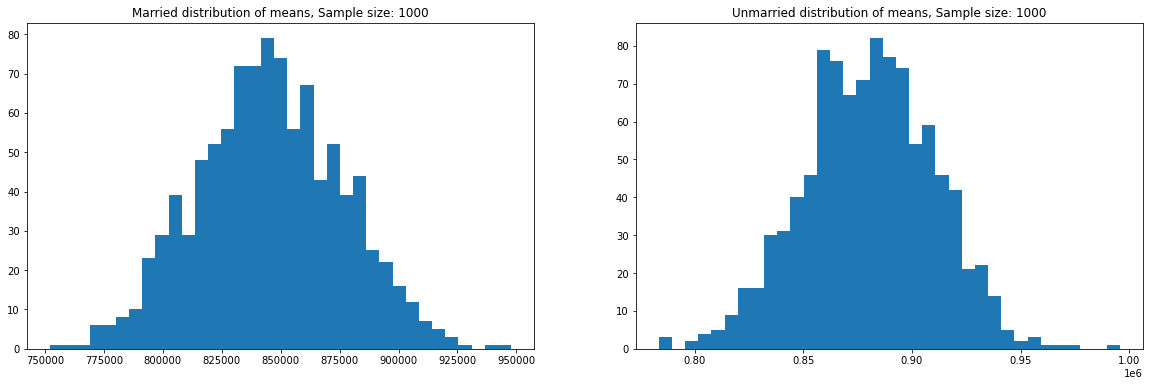

In [45]:
#CLT and Confidence interval considering marital status:

avg_Marital = walmart.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()

avgamt_married = avg_Marital[avg_Marital['Marital_Status']==1]
avgamt_single = avg_Marital[avg_Marital['Marital_Status']==0]

sample_size = 1000
num_repitions = 1000
married_means = []
single_means = []

for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()
    
    married_means.append(avg_married)
    single_means.append(avg_single)
    
    
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(single_means, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 1000")
axis[1].set_title("Unmarried distribution of means, Sample size: 1000")

plt.show()

Observations: The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [46]:
avg_Marital['Marital_Status'].value_counts()

0    3417
1    2474
Name: Marital_Status, dtype: int64

In [47]:
# Calculating 90% confidence interval for avg expenses for married/single for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z90*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z90*sample_std_error_married

Upper_Limit_single=z90*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z90*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 845416.97
Sample avg spend amount for Single: 880197.84

Sample std for Married: 30707.22
Sample std for Single: 30085.50

Sample std error for Married: 971.05
Sample std error for Single: 951.39

Married_CI:  [843819.593588795, 846508.9111925917]
Single_CI:  [878632.8065251067, 881762.8700468935]


In [48]:
#Calculating 95% confidence interval for avg expenses for married/single for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z95*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z95*sample_std_error_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z95*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 845416.97
Sample avg spend amount for Single: 880197.84

Sample std for Married: 30707.22
Sample std for Single: 30085.50

Sample std error for Married: 971.05
Sample std error for Single: 951.39

Married_CI:  [843513.7135771388, 846718.0068923007]
Single_CI:  [878333.1195921695, 882062.5569798306]


In [49]:
#Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z95*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z95*sample_std_error_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z95*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 845416.97
Sample avg spend amount for Single: 880197.84

Sample std for Married: 30707.22
Sample std for Single: 30085.50

Sample std error for Married: 971.05
Sample std error for Single: 951.39

Married_CI:  [843513.7135771388, 846718.0068923007]
Single_CI:  [878333.1195921695, 882062.5569798306]


In [50]:
#Calculating 99% confidence interval for avg expenses for married/single for sample size 1000:

#Taking the values for z at 90%, 95% and 99% confidence interval as:
z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

print("Population avg spend amount for Married: {:.2f}".format(avgamt_married['Purchase'].mean()))
print("Population avg spend amount for Single: {:.2f}\n".format(avgamt_single['Purchase'].mean()))

print("Sample avg spend amount for Married: {:.2f}".format(np.mean(married_means)))
print("Sample avg spend amount for Single: {:.2f}\n".format(np.mean(single_means)))

print("Sample std for Married: {:.2f}".format(pd.Series(married_means).std()))
print("Sample std for Single: {:.2f}\n".format(pd.Series(single_means).std()))

print("Sample std error for Married: {:.2f}".format(pd.Series(married_means).std()/np.sqrt(1000))) 
print("Sample std error for Single: {:.2f}\n".format(pd.Series(single_means).std()/np.sqrt(1000)))

sample_mean_married=np.mean(married_means)
sample_mean_single=np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(1000)
sample_std_error_single=sample_std_single/np.sqrt(1000)

Upper_Limit_married=z99*sample_std_error_male + sample_mean_married
Lower_Limit_married=sample_mean_married - z99*sample_std_error_married

Upper_Limit_single=z99*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single - z99*sample_std_error_single

print("Married_CI: ",[Lower_Limit_married,Upper_Limit_married])
print("Single_CI: ",[Lower_Limit_single,Upper_Limit_single])

Population avg spend amount for Married: 843526.80
Population avg spend amount for Single: 880575.78

Sample avg spend amount for Married: 845416.97
Sample avg spend amount for Single: 880197.84

Sample std for Married: 30707.22
Sample std for Single: 30085.50

Sample std error for Married: 971.05
Sample std error for Single: 951.39

Married_CI:  [842915.5482210111, 847126.9051495094]
Single_CI:  [877747.0651455371, 882648.611426463]


Observation: For married and singles, it can be seen with larger sample size the sample mean gets closer to the population mean. And at greater confidence interval, the range increases.

In [51]:
age_avgamt = walmart.groupby(['User_ID', 'Age'])[['Purchase']].sum()
age_avgamt = age_avgamt.reset_index()

age_avgamt['Age'].value_counts()

26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: Age, dtype: int64

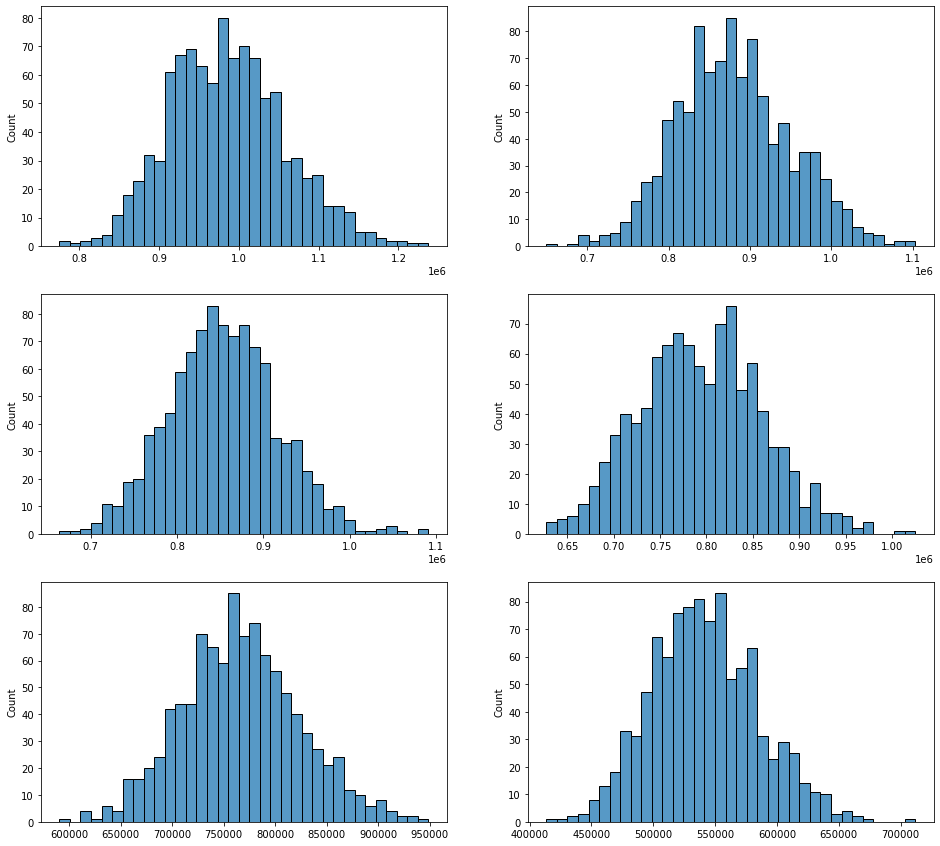

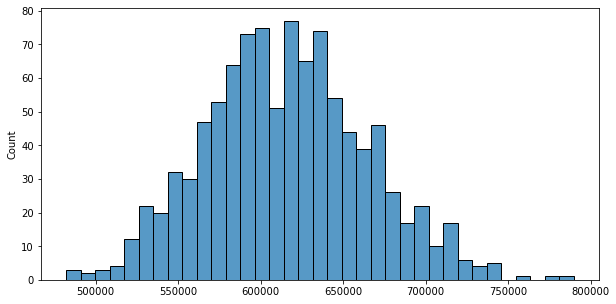

In [52]:
sample_size = 200
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = age_avgamt[age_avgamt['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        

        
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(16, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0])
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1])
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0])
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1])
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35)
plt.show()

Observations: The means sample seems to be normally distributed for all age groups. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [53]:
#Calculating 90% confidence interval for avg expenses for different age groups for sample size 200:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_population_means={}
all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []
    all_population_means[i]=[]
    population_mean=age_avgamt[age_avgamt['Age']==i]['Purchase'].mean()
    all_population_means[i].append(population_mean)
    
print("All age group population mean: \n", all_population_means)
print("\n")
    
for i in age_intervals:
    for j in range(num_repitions):
        
        mean = age_avgamt[age_avgamt['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)
        
        
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = age_avgamt[age_avgamt['Age']==val] 
    
    std_error = z90*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

All age group population mean: 
 {'26-35': [989659.3170969313], '36-45': [879665.7103684661], '18-25': [854863.119738073], '46-50': [792548.7815442561], '51-55': [763200.9230769231], '55+': [539697.2446236559], '0-17': [618867.8119266055]}


For age 26-35 confidence interval of means: (952206.28, 1027112.35)
For age 36-45 confidence interval of means: (832398.89, 926932.53)
For age 18-25 confidence interval of means: (810187.65, 899538.59)
For age 46-50 confidence interval of means: (726209.00, 858888.57)
For age 51-55 confidence interval of means: (703772.36, 822629.48)
For age 55+ confidence interval of means: (487032.92, 592361.57)
For age 0-17 confidence interval of means: (542320.46, 695415.16)


In [54]:
#Calculating 95% confidence interval for avg expenses for different age groups for sample size 200:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = age_avgamt[age_avgamt['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = age_avgamt[age_avgamt['Age']==val] 
    
    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [55]:
#Calculating 99% confidence interval for avg expenses for different age groups for sample size 200:

z90=1.645 #90% Confidence Interval
z95=1.960 #95% Confidence Interval
z99=2.576 #99% Confidence Interval

sample_size = 200
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = age_avgamt[age_avgamt['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:
    
    new_df = age_avgamt[age_avgamt['Age']==val] 
    
    std_error = z99*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error

    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (931009.46, 1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)


Observation: We can see the sample means are closer to the population mean for the differnt age groups. And, with greater confidence interval we have the upper limit and lower limit range increases. As we have seen for gender and marital status, by increasing the sample size we can have the mean of the sample means closer to the population. 

### Recommendations:

1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.

2. Product Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.

3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

8. The top 10 users who have purchased more, company should give more offers and discounts so that they can be retained and can be helpful for companies business. 

9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

10. The top products should be given focus in order to maintain the quality and to further increase the sales of those products.

11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.

### Question:

##### 1. Are women spending more money per transaction than men? Why or Why not?

Ans: No. CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women). 

The reason for less purchase by women could have several factors:
  Males might be doing the purchase for females.
  Salary can be a factor in less purchase.
  We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
  If the female based products quality/quantity needs to be improved for women purchasing.

##### 2. Confidence intervals and distribution of the mean of the expenses by female and male customers.

At 99% Confidence Interval with sample size 1000
Average amount spend by male customers lie in the range 9,23,466.52 - 9,28,700.27
Average amount spend by female customers lie in range 7,10,606.4 - 7,14,831.56


##### 3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

Ans: No. Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.

##### 4. Results when the same activity is performed for Married vs Unmarried

At 99% Confidence Interval with sample size 1000

Average amount spend by married customers lie in the range:  [840848.457560682, 844961.1716434382]
Average amount spend by unmarried customers lie in the range:  [878814.1896535058, 883762.9890144942]

##### 5. Results when the same activity is performed for Age

At 99% Confidence Interval with sample size 200

For age 26-35 confidence interval of means: (931009.46,1048309.18)
For age 36-45 confidence interval of means: (805647.89, 953683.53)
For age 18-25 confidence interval of means: (784903.24, 924823.00)
For age 46-50 confidence interval of means: (688663.50, 896434.06)
For age 51-55 confidence interval of means: (670138.33, 856263.52)
For age 55+ confidence interval of means: (457227.15, 622167.34)
For age 0-17 confidence interval of means: (498997.92, 738737.71)